# Imports

In [41]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [42]:
n = 7 # 5~9
label_name = "stat8" # update stat number
layers = [7, 2] # mess with the layers (last layer should be the number of possibilities for this stat)

epochs = 1200 # increase if the loss is still decreasing by the end of training
train_split, test_split = 0.8, 0.2
learning_rate = 0.005 # don't change probably
momentum = 0.9 # don't change probably
batch_size = 64 # higher acc and longer runtime if smaller

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [43]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [44]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 45.09292370080948
Epoch 1, Loss 41.80180937051773
Epoch 2, Loss 40.730195462703705
Epoch 3, Loss 37.34805881977081
Epoch 4, Loss 32.78439289331436
Epoch 5, Loss 29.056225389242172
Epoch 6, Loss 27.29181496798992
Epoch 7, Loss 26.073119938373566
Epoch 8, Loss 25.853797614574432
Epoch 9, Loss 24.923200875520706
Epoch 10, Loss 26.02155312895775
Epoch 11, Loss 24.409806594252586
Epoch 12, Loss 24.934793010354042
Epoch 13, Loss 23.77066297829151
Epoch 14, Loss 25.201998502016068
Epoch 15, Loss 23.75958028435707
Epoch 16, Loss 22.748922780156136
Epoch 17, Loss 22.829331293702126
Epoch 18, Loss 23.234361827373505
Epoch 19, Loss 22.324228033423424
Epoch 20, Loss 22.74546481668949
Epoch 21, Loss 22.094721615314484
Epoch 22, Loss 21.901068553328514
Epoch 23, Loss 20.98462662100792
Epoch 24, Loss 20.02809715270996
Epoch 25, Loss 20.11391467601061
Epoch 26, Loss 20.711363449692726
Epoch 27, Loss 19.11346398293972
Epoch 28, Loss 18.80373676121235
Epoch 29, Loss 18.243467889726162
Epoc

KeyboardInterrupt: 

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

C:\Users\lewil\AppData\Local\Temp\ipykernel_26476\2152728193.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


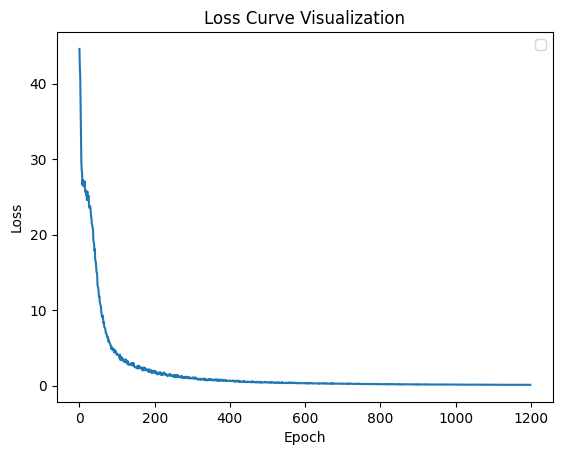

In [ ]:
# plot loss vs epoch
plt.plot([i for i in range(epochs)], losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss Curve Visualization')
plt.legend()
plt.savefig(f'figures/loss_curve_{label_name}_{n}.png')

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[975, 9], [3, 21]]


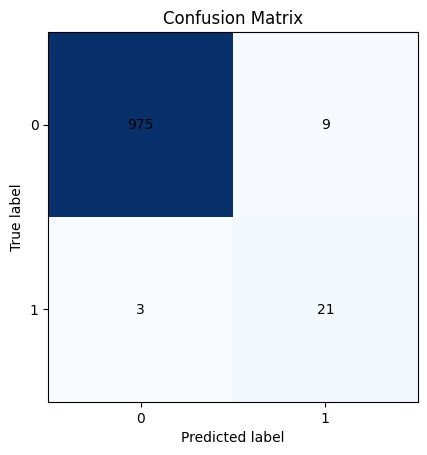

Accuracy for class 0 = 99.08536585365853%
Accuracy for class 1 = 87.5%
Overall accuracy = 98.80952380952381%


In [ ]:
confusion_matrix = evaluate_model(model, test_dataset) # try training_dataset and test_dataset

print(confusion_matrix)
confusion_matrix.plot()
confusion_matrix.print_accuracy()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

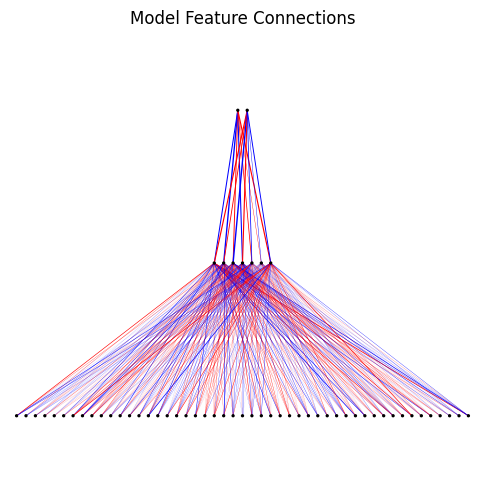

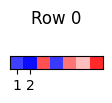

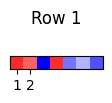

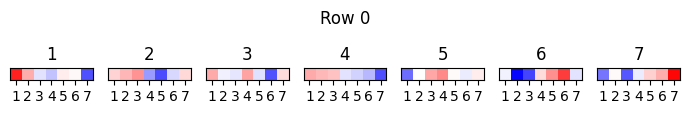

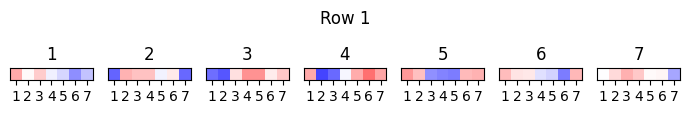

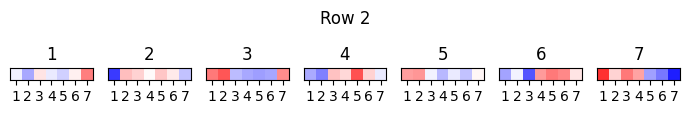

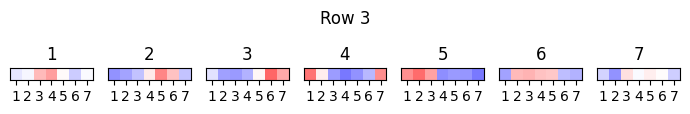

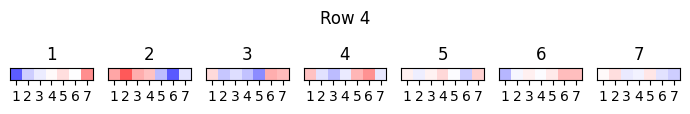

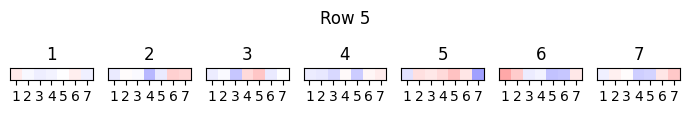

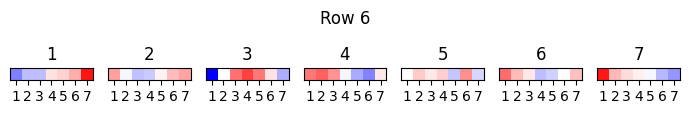

In [45]:
model.plot_connections()

model.plot_heatmap_feature(1, 0)
model.plot_heatmap_feature(1, 1)

for i in range(n): model.plot_heatmap_feature(0, i)